## EDA

In [1]:
# Load corpus.txt
corpus_path = '/content/corpus.txt'
corpus_words = []
try:
    with open(corpus_path, 'r') as f:
        corpus_words = [line.strip() for line in f if line.strip()] # Read and remove blank lines
except FileNotFoundError:
    print(f"Error: File not found at {corpus_path}")
except Exception as e:
    print(f"An error occurred while reading {corpus_path}: {e}")

# Load test.txt
test_path = '/content/test.txt'
test_words = []
try:
    with open(test_path, 'r') as f:
        test_words = [line.strip() for line in f if line.strip()] # Read and remove blank lines
except FileNotFoundError:
    print(f"Error: File not found at {test_path}")
except Exception as e:
    print(f"An error occurred while reading {test_path}: {e}")

print(f"Loaded {len(corpus_words)} words from corpus.txt")
print(f"Loaded {len(test_words)} words from test.txt")

Loaded 50000 words from corpus.txt
Loaded 2000 words from test.txt


### Analyze corpus.txt

Word length distribution in corpus.txt:
Counter({9: 6808, 10: 6465, 8: 6348, 11: 5452, 7: 5111, 12: 4292, 6: 3755, 13: 3094, 5: 2340, 14: 2019, 15: 1226, 4: 1169, 16: 698, 3: 388, 17: 375, 18: 174, 19: 88, 2: 84, 1: 46, 20: 40, 21: 16, 22: 8, 23: 3, 24: 1})


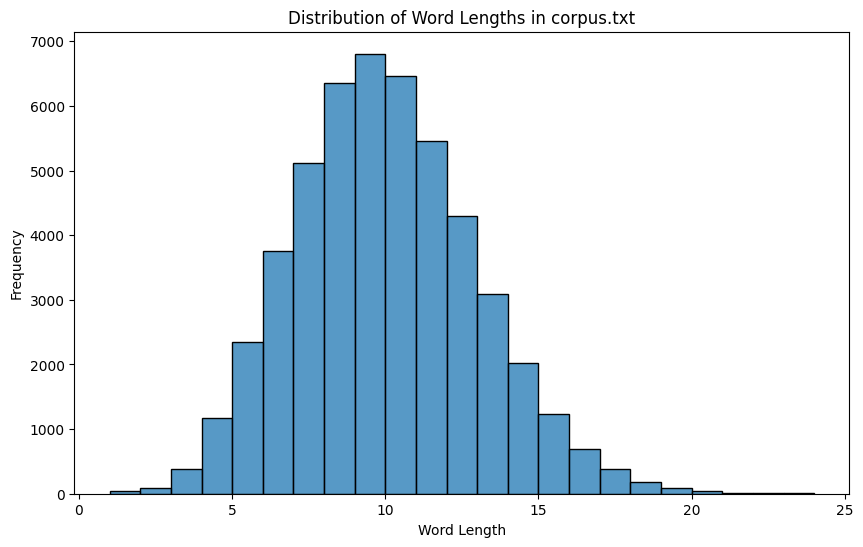

In [2]:
# Find the distribution of word lengths in corpus
word_lengths_corpus = [len(word) for word in corpus_words]
from collections import Counter
word_length_distribution_corpus = Counter(word_lengths_corpus)
print("Word length distribution in corpus.txt:")
print(word_length_distribution_corpus)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(word_lengths_corpus, bins=sorted(word_length_distribution_corpus.keys()), kde=False)
plt.title('Distribution of Word Lengths in corpus.txt')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

In [3]:
# Find duplicates in corpus
duplicates_corpus = [word for word, count in Counter(corpus_words).items() if count > 1]
print(f"\nNumber of duplicate words in corpus.txt: {len(duplicates_corpus)}")
if duplicates_corpus:
    print("Example duplicates in corpus.txt:", duplicates_corpus[:10]) # Print first 10 duplicates as example


Number of duplicate words in corpus.txt: 128
Example duplicates in corpus.txt: ['mdel', 'lnaguage', 'danke', 'dveelopment', 'ola', 'softwar', 'dia', 'katze', 'bonjour', 'prego']


In [4]:
# Find if there are uppercase and lowercase letters or only one case in corpus
has_uppercase_corpus = any(any(c.isupper() for c in word) for word in corpus_words)
has_lowercase_corpus = any(any(c.islower() for c in word) for word in corpus_words)

print("\nCase analysis in corpus.txt:")
if has_uppercase_corpus and has_lowercase_corpus:
    print("Contains both uppercase and lowercase letters.")
elif has_uppercase_corpus:
    print("Contains only uppercase letters.")
elif has_lowercase_corpus:
    print("Contains only lowercase letters.")
else:
    print("Contains no letters (empty or only symbols/numbers).")


Case analysis in corpus.txt:
Contains only lowercase letters.


In [5]:
# Find if there are uppercase and lowercase letters or only one case in test
has_uppercase_test = any(any(c.isupper() for c in word) for word in test_words)
has_lowercase_test = any(any(c.islower() for c in word) for word in test_words)

print("\nCase analysis in test.txt:")
if has_uppercase_test and has_lowercase_test:
    print("Contains both uppercase and lowercase letters.")
elif has_uppercase_test:
    print("Contains only uppercase letters.")
elif has_lowercase_test:
    print("Contains only lowercase letters.")
else:
    print("Contains no letters (empty or only symbols/numbers).")


Case analysis in test.txt:
Contains only lowercase letters.


In [6]:
# Find blank words in corpus (already handled during loading with line.strip())
blank_words_corpus = [word for word in corpus_words if not word]
print(f"\nNumber of blank words in corpus.txt: {len(blank_words_corpus)}")


Number of blank words in corpus.txt: 0


In [7]:
import re
# Find non singular words in the lines of corpus
non_singular_corpus = [word for word in corpus_words if len(word.split()) > 1]
print(f"\nNumber of non-singular words (phrases) in corpus.txt: {len(non_singular_corpus)}")
if non_singular_corpus:
    print("Example non-singular words in corpus.txt:", non_singular_corpus[:10])


Number of non-singular words (phrases) in corpus.txt: 21
Example non-singular words in corpus.txt: ['au revoir', 'au revoir', 'au revoir', 'au revoir', 'au revoir', 'au revoir', 'au revoir', 'au revoir', 'au revoir', 'au revoir']


In [8]:
# Find non singular words in the lines of test
non_singular_test = [word for word in test_words if len(word.split()) > 1]
print(f"\nNumber of non-singular words (phrases) in test.txt: {len(non_singular_test)}")
if non_singular_test:
    print("Example non-singular words in test.txt:", non_singular_test[:10])


Number of non-singular words (phrases) in test.txt: 0


# write inference for eda
<hr>

## preproces

In [9]:
# Find the total number of duplicate rows (occurrences of words appearing more than once)
word_counts = Counter(corpus_words)
total_duplicate_rows = sum(count for word, count in word_counts.items() if count > 1)
print(f"Total number of rows with duplicate words in corpus.txt: {total_duplicate_rows}")

Total number of rows with duplicate words in corpus.txt: 730


In [10]:
# Remove duplicates from corpus
corpus_words_unique = list(set(corpus_words))
print(f"Number of words after removing duplicates: {len(corpus_words_unique)}")

# Remove the non-singular word 'au revoir'
phrase_to_remove = 'au revoir'
corpus_words_cleaned = [word for word in corpus_words_unique if word != phrase_to_remove]
print(f"Number of words after removing '{phrase_to_remove}': {len(corpus_words_cleaned)}")

# Update corpus_words to the cleaned list
corpus_words = corpus_words_cleaned

Number of words after removing duplicates: 49398
Number of words after removing 'au revoir': 49397


In [11]:
# Check if all words in corpus_words contain only alphabets
all_corpus_alpha = all(word.isalpha() for word in corpus_words)

if all_corpus_alpha:
    print("All words in corpus.txt contain only alphabetic characters.")
else:
    print("Some words in corpus.txt contain non-alphabetic characters.")
    non_alpha_corpus = [word for word in corpus_words if not word.isalpha()]
    print("Example non-alphabetic words in corpus.txt:", non_alpha_corpus[:10]) # Print first 10 as example

# Check if all words in test_words contain only alphabets
all_test_alpha = all(word.isalpha() for word in test_words)

if all_test_alpha:
    print("\nAll words in test.txt contain only alphabetic characters.")
else:
    print("\nSome words in test.txt contain non-alphabetic characters.")
    non_alpha_test = [word for word in test_words if not word.isalpha()]
    print("Example non-alphabetic words in test.txt:", non_alpha_test[:10]) # Print first 10 as example

All words in corpus.txt contain only alphabetic characters.

All words in test.txt contain only alphabetic characters.


## train hmm
<hr>

In [19]:
import numpy as np
import string
from collections import defaultdict
import json

# --- 1. Define Constants and Check for Prerequisite ---
hmm_model_file = 'hmm_models.json'
alphabet = string.ascii_lowercase
alphabet_map = {char: i for i, char in enumerate(alphabet)}
num_letters = len(alphabet)

# Check if the corpus_words variable exists and is populated
if 'corpus_words' not in locals() or not corpus_words:
    print("Error: The variable 'corpus_words' is not defined or is empty.")
    print("Please run the data loading and cleaning cell first.")
else:
    print(f"Using the pre-loaded and cleaned corpus of {len(corpus_words)} words.")

    # --- 2. Group Words by Length ---
    words_by_length = defaultdict(list)
    for word in corpus_words:
        words_by_length[len(word)].append(word)

    print(f"\nGrouped words into {len(words_by_length)} buckets based on length.")
    print(f"Word lengths found: {sorted(words_by_length.keys())}")

    # --- 3. Initialize and "Train" HMMs ---
    hmm_models = {}
    print("\nStarting HMM 'training' (calculating probabilities)...")

    for length, words in words_by_length.items():
        if length == 0:
            print("Skipping length 0.")
            continue

        num_words_for_length = len(words)

        # --- Initialize pi (Initial Probabilities) ---
        # Probability of starting in the first state is 1.0, others 0.0
        pi = np.zeros(length)
        pi[0] = 1.0

        # --- Initialize A (Transition Probabilities) ---
        # Probability of moving from state i to i+1 is 1.0, others 0.0
        A = np.zeros((length, length))
        for i in range(length - 1):
            A[i, i + 1] = 1.0

        # --- Calculate B (Emission Probabilities) with Laplace (Add-1) Smoothing ---
        # Initialize counts to 1 for smoothing (one for each letter)
        B = np.ones((length, num_letters))

        # Count letter occurrences at each position
        for word in words:
            for pos in range(length):
                char = word[pos]
                if char in alphabet_map: # Should always be true for our cleaned data
                    char_index = alphabet_map[char]
                    B[pos, char_index] += 1

        # Normalize counts to get probabilities
        # Denominator is (total words + K), where K is num_letters (26)
        B_sum = num_words_for_length + num_letters
        B = B / B_sum

        # Store the calculated HMM parameters
        hmm_models[length] = {
            'pi': pi.tolist(),  # Convert numpy arrays to lists for JSON serialization
            'A': A.tolist(),
            'B': B.tolist()
        }

    print(f"Finished processing. Trained {len(hmm_models)} HMM models.")

    # --- 4. Save Models to a File ---
    try:
        with open(hmm_model_file, 'w') as f:
            json.dump(hmm_models, f, indent=2)
        print(f"Successfully saved all HMM models to {hmm_model_file}")
    except Exception as e:
        print(f"Error saving HMM models to JSON: {e}")

    # --- 5. Print an Example ---
    example_length = 5 # A common word length
    if example_length in hmm_models:
        print(f"\n--- Example: HMM for {example_length}-letter words ---")

        # Pretty-print Emission probabilities for the first state (first letter)
        print(f"\nEmission Probabilities (B) for State 1 (First Letter):")
        b_state_1 = hmm_models[example_length]['B'][0]
        prob_dict = {char: f"{prob:.4f}" for char, prob in zip(alphabet, b_state_1)}
        print(json.dumps(prob_dict, indent=2))
    else:
        print(f"\nCould not find an HMM model for length {example_length} to show as an example.")

Using the pre-loaded and cleaned corpus of 49397 words.

Grouped words into 24 buckets based on length.
Word lengths found: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Starting HMM 'training' (calculating probabilities)...
Finished processing. Trained 24 HMM models.
Successfully saved all HMM models to hmm_models.json

--- Example: HMM for 5-letter words ---

Emission Probabilities (B) for State 1 (First Letter):
{
  "a": "0.0642",
  "b": "0.0615",
  "c": "0.0647",
  "d": "0.0427",
  "e": "0.0239",
  "f": "0.0472",
  "g": "0.0404",
  "h": "0.0326",
  "i": "0.0202",
  "j": "0.0202",
  "k": "0.0243",
  "l": "0.0505",
  "m": "0.0537",
  "n": "0.0280",
  "o": "0.0239",
  "p": "0.0569",
  "q": "0.0096",
  "r": "0.0390",
  "s": "0.1317",
  "t": "0.0670",
  "u": "0.0271",
  "v": "0.0138",
  "w": "0.0404",
  "x": "0.0018",
  "y": "0.0069",
  "z": "0.0083"
}


In [13]:
import math

# --- 1. Define Constants and Check for Prerequisites ---
alphabet = string.ascii_lowercase
alphabet_map = {char: i for i, char in enumerate(alphabet)}
hmm_model_file = 'hmm_models.json'

# Check if test_words variable exists
if 'test_words' not in locals() or not test_words:
    print("Loading test.txt as 'test_words' was not found in memory.")
    test_path = 'test.txt'
    try:
        with open(test_path, 'r') as f:
            # Read, strip, and filter out any multi-word lines
            test_words = [line.strip() for line in f if line.strip() and ' ' not in line]
        print(f"Successfully loaded and cleaned {len(test_words)} words from {test_path}")
    except FileNotFoundError:
        print(f"Error: File not found at {test_path}")
        test_words = []
    except Exception as e:
        print(f"An error occurred while reading {test_path}: {e}")
        test_words = []
else:
    print(f"Using the pre-loaded 'test_words' list containing {len(test_words)} words.")

# Check if hmm_models variable exists, otherwise load from file
if 'hmm_models' not in locals() or not hmm_models:
    print("Loading HMM models from 'hmm_models.json' as it was not found in memory.")
    try:
        with open(hmm_model_file, 'r') as f:
            # Convert string keys back to int keys
            hmm_models = {int(k): v for k, v in json.load(f).items()}
        print(f"Successfully loaded {len(hmm_models)} models from {hmm_model_file}")
    except FileNotFoundError:
        print(f"Error: {hmm_model_file} not found. Please run the training cell first.")
        hmm_models = {}
    except Exception as e:
        print(f"An error occurred while loading {hmm_model_file}: {e}")
        hmm_models = {}
else:
    print(f"Using the pre-loaded 'hmm_models' dictionary containing {len(hmm_models)} models.")


# --- 2. Group Test Words ---
# This is now done in the global scope so it can be used for the final report
test_words_by_length = defaultdict(list)
if 'test_words' in locals() and test_words:
    for word in test_words:
        test_words_by_length[len(word)].append(word)
    print(f"\nGrouped test words into {len(test_words_by_length)} buckets.")
else:
    print("\nCannot group test words, list is empty.")

# --- 3. Evaluation Function ---

def evaluate_hmms(test_words_by_length, hmm_models):
    """
    Evaluates the trained HMMs against a test set using log-likelihood.
    """
    if not test_words_by_length or not hmm_models:
        print("Cannot evaluate. Test words or HMM models are missing.")
        return None

    average_log_likelihoods = {}

    print("Calculating average log-likelihood for each word length...")

    for length, words in test_words_by_length.items():
        if length not in hmm_models:
            print(f"Warning: No HMM model found for length {length}. Skipping {len(words)} test words.")
            continue

        model = hmm_models[length]
        B = np.array(model['B']) # Emission probabilities

        total_log_likelihood = 0
        word_count = 0

        for word in words:
            word_log_likelihood = 0
            valid_word = True
            for pos, char in enumerate(word):
                if char in alphabet_map:
                    char_index = alphabet_map[char]
                    # Get the log of the emission probability
                    # B[pos, char_index] is P(char | State_pos)
                    prob = B[pos, char_index]
                    if prob == 0: # Should not happen with smoothing, but good to check
                        word_log_likelihood = -np.inf # Assign negative infinity for 0-prob
                        break
                    word_log_likelihood += math.log(prob)
                else:
                    # Character not in alphabet (e.g., punctuation), skip word
                    valid_word = False
                    break

            if valid_word:
                total_log_likelihood += word_log_likelihood
                word_count += 1

        if word_count > 0:
            avg_ll = total_log_likelihood / word_count
            average_log_likelihoods[length] = avg_ll
        else:
            print(f"No valid test words found for length {length}.")

    print("Evaluation complete.")
    return average_log_likelihoods

# --- 4. Run Evaluation and Print Results ---
avg_log_likelihoods = evaluate_hmms(test_words_by_length, hmm_models)

if avg_log_likelihoods:
    print("\n--- Average Log-Likelihood per Word (Higher is Better) ---")
    # Print a few examples
    example_lengths = sorted([l for l in avg_log_likelihoods.keys() if 5 <= l <= 10])

    if not example_lengths:
        example_lengths = sorted(avg_log_likelihoods.keys())[:6] # Fallback

    for length in example_lengths:
        print(f"Length {length} ({len(test_words_by_length[length])} words): {avg_log_likelihoods[length]:.4f}")

    # Save the full report to a file
    evaluation_report_file = 'hmm_evaluation_report.json'
    try:
        with open(evaluation_report_file, 'w') as f:
            json.dump(avg_log_likelihoods, f, indent=2)
        print(f"\nFull evaluation report saved to {evaluation_report_file}")
    except Exception as e:
        print(f"Error saving evaluation report: {e}")
else:
    print("\nNo evaluation results to display.")

Using the pre-loaded 'test_words' list containing 2000 words.
Using the pre-loaded 'hmm_models' dictionary containing 24 models.

Grouped test words into 21 buckets.
Calculating average log-likelihood for each word length...
Evaluation complete.

--- Average Log-Likelihood per Word (Higher is Better) ---
Length 5 (91 words): -14.3980
Length 6 (138 words): -16.7804
Length 7 (205 words): -19.9338
Length 8 (246 words): -22.3930
Length 9 (274 words): -25.1508
Length 10 (282 words): -27.7289

Full evaluation report saved to hmm_evaluation_report.json


## rl
<hr>

In [42]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import math
import string
from collections import defaultdict, deque
from tqdm import tqdm
import copy
import itertools

# --- Check for prerequisites ---
if 'corpus_words' not in locals() or 'test_words' not in locals() or 'hmm_models' not in locals():
    print("="*50)
    print("ERROR: Prerequisite variables not found.")
    print("Please ensure you have run the previous cells to create:")
    print("- 'corpus_words' (list of training words)")
    print("- 'test_words' (list of test words)")
    print("- 'hmm_models' (dict of HMM parameters)")
    print("="*50)
else:
    print("Prerequisite variables (corpus_words, test_words, hmm_models) found.")

# --- 1. The Hangman Environment ---
class HangmanEnv(gym.Env):
    """
    Custom Gymnasium Environment for Hangman.
    This environment's state includes probabilities from a pre-trained HMM.
    """

    def __init__(self, words_list, hmm_models, max_word_len, max_lives=6):
        super(HangmanEnv, self).__init__()

        self.words_list = words_list
        self.hmm_models = hmm_models
        self.max_lives = max_lives
        self.max_word_len = max_word_len

        # --- Define Constants ---
        self.alphabet = string.ascii_lowercase
        self.alphabet_map = {char: i for i, char in enumerate(self.alphabet)}

        # --- Define Spaces ---
        # Action: 26 discrete actions, one for each letter
        self.action_space = spaces.Discrete(26)

        # Observation Space (State): A flat vector
        # 1. Masked Word (size=max_word_len): 0=blank, 1-26=letter
        # 2. Guessed Letters (size=26): 0=not guessed, 1=guessed
        # 3. Lives Left (size=1)
        # 4. HMM Probabilities (size=26)
        self.state_size = self.max_word_len + 26 + 1 + 26
        self.observation_space = spaces.Box(
            low=0.0, high=26.0, shape=(self.state_size,), dtype=np.float32
        )

        # --- Initialize Game State Variables ---
        self.secret_word = ""
        self.word_length = 0
        self.masked_word = []
        self.lives_left = 0
        self.guessed_letters = set()
        self.guessed_indices = set()

    def _get_hmm_probs(self):
        """The HMM 'Oracle'."""
        if self.word_length not in self.hmm_models:
            # Fallback for words whose length model wasn't trained (e.g., from test set)
            return np.ones(26) / 26.0

        B = np.array(self.hmm_models[self.word_length]['B'])

        total_probs = np.zeros(26)

        # Sum probabilities for all blank positions
        for i in range(self.word_length):
            if self.masked_word[i] == '_':
                total_probs += B[i, :]

        # Mask out letters that have already been guessed
        total_probs[list(self.guessed_indices)] = 0.0

        # Normalize
        norm = np.sum(total_probs)
        if norm > 0:
            total_probs /= norm
        else:
            # If all remaining letters have 0 prob, set to uniform (unlikely)
            available_mask = np.ones(26, dtype=bool)
            available_mask[list(self.guessed_indices)] = False
            num_available = np.sum(available_mask)
            if num_available > 0:
                total_probs[available_mask] = 1.0 / num_available

        return total_probs.astype(np.float32)

    def _get_obs(self):
        """Constructs the state vector from the current game state."""
        # 1. Masked Word state (padded to max_word_len)
        word_state = np.zeros(self.max_word_len, dtype=np.float32)
        for i, char in enumerate(self.masked_word):
            if char != '_':
                word_state[i] = self.alphabet_map[char] + 1

        # 2. Guessed Letters state
        guessed_state = np.zeros(26, dtype=np.float32)
        guessed_state[list(self.guessed_indices)] = 1.0

        # 3. Lives Left state
        lives_state = np.array([self.lives_left], dtype=np.float32)

        # 4. HMM Probabilities state
        hmm_probs = self._get_hmm_probs()

        # Concatenate all parts into one flat state vector
        obs = np.concatenate((word_state, guessed_state, lives_state, hmm_probs))
        return obs

    def reset(self, seed=None):
        super().reset(seed=seed)

        self.secret_word = self.np_random.choice(self.words_list)
        self.word_length = len(self.secret_word)
        self.masked_word = ['_'] * self.word_length
        self.lives_left = self.max_lives
        self.guessed_letters = set()
        self.guessed_indices = set()

        obs = self._get_obs()
        info = {
            'secret_word': self.secret_word,
            'status': 'ongoing',
            'type': 'reset'
        }

        return obs, info

    def step(self, action):
        """
        Executes one step in the environment.
        'action' is an int 0-25 corresponding to a letter.
        """
        guess = self.alphabet[action]
        terminated = False
        info = {'type': 'unknown', 'status': 'ongoing'}

        # --- Define Rewards based on the scoring formula ---

        # Case 1: Repeated Guess
        if guess in self.guessed_letters:
            reward = -2  # Penalty for repeated guess
            info['type'] = 'repeated'

        # Case 2: New Guess
        else:
            self.guessed_letters.add(guess)
            self.guessed_indices.add(action)

            # Subcase 2a: Wrong Guess
            if guess not in self.secret_word:
                self.lives_left -= 1
                reward = -20  # Penalty for wrong guess
                info['type'] = 'wrong'

            # Subcase 2b: Correct Guess
            else:
                reward = +5  # No immediate reward/penalty, wait for win
                info['type'] = 'correct'
                # Update the masked word
                for i, char in enumerate(self.secret_word):
                    if char == guess:
                        self.masked_word[i] = guess

        # --- Check for Game End ---
        if '_' not in self.masked_word:
            # Game Won
            terminated = True
            reward += 100  # Large bonus for winning, as per scoring formula
            info['status'] = 'win'

        elif self.lives_left <= 0:
            # Game Lost
            terminated = True
            reward -= 100  # No *additional* penalty, wrong guesses already penalized
            info['status'] = 'lose'

        obs = self._get_obs()

        # We don't use truncation in Hangman
        truncated = False

        return obs, reward, terminated, truncated, info

Prerequisite variables (corpus_words, test_words, hmm_models) found.


In [43]:
# --- 2. The Deep Q-Network (DQN) ---
class QNetwork(nn.Module):
    """Simple MLP to approximate Q-values."""
    def __init__(self, state_size, action_size, hidden_dim=128):
        super(QNetwork, self).__init__()
        self.layer1 = nn.Linear(state_size, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, action_size)

    def forward(self, state):
        x = F.relu(self.layer1(state))
        x = F.relu(self.layer2(x))
        return self.layer3(x) # Raw Q-values

In [44]:
# --- 3. The Replay Buffer ---
class ReplayBuffer:
    """A simple Replay Buffer for storing experiences."""
    def __init__(self, buffer_size):
        self.buffer = deque(maxlen=buffer_size)

    def push(self, state, action, reward, next_state, done):
        # Store as tuples
        experience = (state, action, reward, next_state, done)
        self.buffer.append(experience)

    def sample(self, batch_size):
        # Sample a random batch of experiences
        batch = random.sample(self.buffer, batch_size)

        # Unzip the batch
        states, actions, rewards, next_states, dones = zip(*batch)

        # Convert to numpy arrays for easier handling
        return (
            np.array(states),
            np.array(actions),
            np.array(rewards),
            np.array(next_states),
            np.array(dones)
        )

    def __len__(self):
        return len(self.buffer)

In [45]:
# --- 4. The DQN Agent ---
class DQNAgent:
    """The RL Agent's 'Brain'."""
    def __init__(self, state_size, action_size, max_word_len,
                 buffer_size=10000,
                 batch_size=64,
                 gamma=0.99,
                 lr=1e-4,
                 target_update=10):

        self.state_size = state_size
        self.action_size = action_size
        self.max_word_len = max_word_len
        self.batch_size = batch_size
        self.gamma = gamma
        self.target_update = target_update

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"DQN Agent using device: {self.device}")

        # Initialize Policy and Target Networks
        self.policy_net = QNetwork(state_size, action_size).to(self.device)
        self.target_net = QNetwork(state_size, action_size).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()

        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.memory = ReplayBuffer(buffer_size)
        self.steps_done = 0

    def select_action(self, state, epsilon=0.0):
        """Selects an action using an epsilon-greedy policy with masking."""
        self.steps_done += 1

        # --- Find out which letters have been guessed ---
        # The 'guessed' part of the state vector starts after 'max_word_len'
        guessed_mask_start = self.max_word_len
        guessed_mask_end = self.max_word_len + 26
        guessed_mask = state[guessed_mask_start:guessed_mask_end]

        # Exploration
        if random.random() < epsilon:
            # Smart exploration: only pick from *unguessed* letters
            available_actions = [i for i, guessed in enumerate(guessed_mask) if guessed == 0.0]
            if not available_actions: # If all letters are guessed, just pick one
                return random.randrange(self.action_size)
            return random.choice(available_actions)

        # Exploitation
        else:
            with torch.no_grad():
                state_t = torch.tensor(state, dtype=torch.float32, device=self.device).unsqueeze(0)
                q_values = self.policy_net(state_t) # Shape [1, 26]

                # --- Apply the mask ---
                # Set Q-value of already-guessed letters to negative infinity
                # so they are never chosen as the max.
                guessed_mask_t = torch.tensor(guessed_mask, dtype=torch.bool, device=self.device).unsqueeze(0)
                q_values[guessed_mask_t] = -torch.inf

                # Choose the action with the highest Q-value
                # If all Q-values are -inf (i.e., all letters guessed), this will
                # just pick the first one (action 0), which is fine.
                return q_values.max(1)[1].item()

    def optimize_model(self):
        """Performs one optimization step on the policy network."""
        if len(self.memory) < self.batch_size:
            return  # Not enough experiences to sample

        # Sample a batch from memory
        states, actions, rewards, next_states, dones = self.memory.sample(self.batch_size)

        # Convert to Tensors
        states_t = torch.tensor(states, dtype=torch.float32, device=self.device)
        actions_t = torch.tensor(actions, dtype=torch.int64, device=self.device).unsqueeze(1)
        rewards_t = torch.tensor(rewards, dtype=torch.float32, device=self.device).unsqueeze(1)
        next_states_t = torch.tensor(next_states, dtype=torch.float32, device=self.device)
        dones_t = torch.tensor(dones, dtype=torch.float32, device=self.device).unsqueeze(1)

        # --- Compute Q(s, a) ---
        # Get Q-values for all actions from the policy_net
        q_values = self.policy_net(states_t)
        # Select the Q-value for the action that was actually taken
        state_action_values = q_values.gather(1, actions_t)

        # --- Compute V(s') = max_a Q(s', a) ---
        with torch.no_grad():
            # Get Q-values for next_states from the target_net
            next_q_values = self.target_net(next_states_t)
            # Select the best Q-value (max) for each next_state
            next_state_values = next_q_values.max(1)[0].unsqueeze(1)
            # Zero out the value for terminal states (where 'done' is True)
            next_state_values = next_state_values * (1 - dones_t)

        # --- Compute Expected Q(s, a) ---
        # Expected Q = Reward + (Gamma * V(s'))
        expected_state_action_values = rewards_t + (self.gamma * next_state_values)

        # --- Compute Loss (e.g., Smooth L1 Loss) ---
        loss = F.smooth_l1_loss(state_action_values, expected_state_action_values)

        # --- Optimize ---
        self.optimizer.zero_grad()
        loss.backward()
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(self.policy_net.parameters(), 1.0)
        self.optimizer.step()

    def update_target_network(self):
        """Syncs the target network with the policy network."""
        self.target_net.load_state_dict(self.policy_net.state_dict())


--- 1. Starting Agent Training ---
Global Max Word Length set to: 24
DQN Agent using device: cuda


Training Episodes: 100%|██████████| 50000/50000 [37:05<00:00, 22.47it/s]


Training Complete.


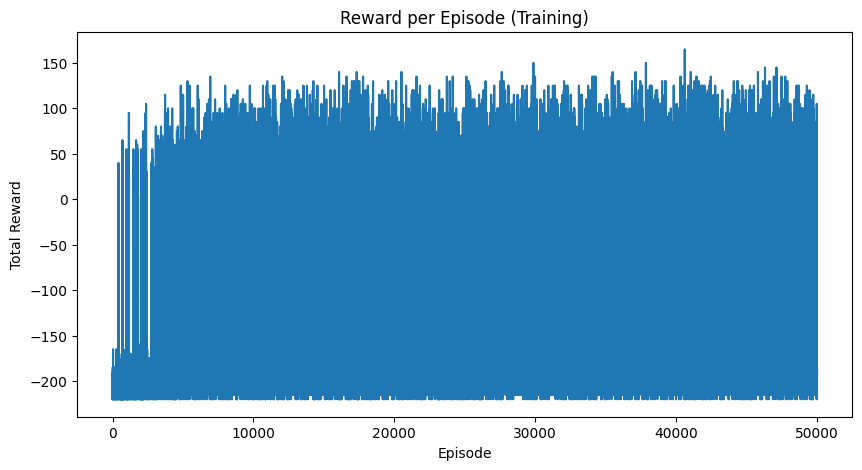

In [46]:
# --- 5. Training Loop ---
if 'corpus_words' in locals() and 'hmm_models' in locals():
    print("\n--- 1. Starting Agent Training ---")

    # --- Hyperparameters ---
    NUM_EPISODES = 50000      # Number of games to play for training
    EPS_START = 0.9           # Starting exploration rate
    EPS_END = 0.05            # Minimum exploration rate
    EPS_DECAY = 50000         # How fast to reduce exploration
    TARGET_UPDATE = 10        # How many episodes between syncing target_net
    BATCH_SIZE = 128
    BUFFER_SIZE = 50000
    LEARNING_RATE = 1e-4

    # Initialize Environment and Agent
    # --- Calculate Global Max Length from TRAINING set ---
    MAX_WORD_LEN_GLOBAL = max(len(w) for w in corpus_words)
    print(f"Global Max Word Length set to: {MAX_WORD_LEN_GLOBAL}")

    # Initialize Environment and Agent
    train_env = HangmanEnv(corpus_words, hmm_models, max_word_len=MAX_WORD_LEN_GLOBAL)
    state_size = train_env.state_size
    action_size = train_env.action_space.n

    agent = DQNAgent(
        state_size,
        action_size,
        max_word_len=MAX_WORD_LEN_GLOBAL,
        buffer_size=BUFFER_SIZE,
        batch_size=BATCH_SIZE,
        lr=LEARNING_RATE,
        target_update=TARGET_UPDATE
    )

    episode_rewards = []

    for i_episode in tqdm(range(1, NUM_EPISODES + 1), desc="Training Episodes"):
        state, _ = train_env.reset()
        total_reward = 0

        for t in itertools.count():
            # Calculate current epsilon
            epsilon = EPS_END + (EPS_START - EPS_END) * \
                      math.exp(-1. * agent.steps_done / EPS_DECAY)

            # Select and perform an action
            action = agent.select_action(state, epsilon)
            next_state, reward, terminated, truncated, _ = train_env.step(action)

            done = terminated or truncated
            total_reward += reward

            # Store the transition in memory
            agent.memory.push(state, action, reward, next_state, done)

            # Move to the next state
            state = next_state

            # Perform one step of optimization on the policy network
            agent.optimize_model()

            if done:
                break

        episode_rewards.append(total_reward)

        # Update the target network
        if i_episode % agent.target_update == 0:
            agent.update_target_network()

    print("Training Complete.")

    # Simple plot of rewards (optional, but good to see)
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 5))
        plt.plot(episode_rewards)
        plt.title('Reward per Episode (Training)')
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.show()
    except ImportError:
        print("\nMatplotlib not found. Skipping plot of training rewards.")
        print("To see the plot, run: pip install matplotlib")

else:
    print("\nSkipping Training: Prerequisite variables not found.")

In [47]:
# --- 6. Evaluation Loop ---
if 'test_words' in locals() and 'agent' in locals():
    print("\n--- 2. Starting Agent Evaluation ---")

    NUM_TEST_GAMES = 2000  # As specified in the problem

    # Use the test word list for evaluation
    eval_env = HangmanEnv(test_words, hmm_models, max_word_len=MAX_WORD_LEN_GLOBAL)

    # Turn off exploration for evaluation
    agent.policy_net.eval()

    # --- Initialize Metrics ---
    wins = 0
    total_wrong_guesses = 0
    total_repeated_guesses = 0

    for _ in tqdm(range(NUM_TEST_GAMES), desc="Evaluation Games"):
        state, _ = eval_env.reset()
        done = False

        while not done:
            # Select action with epsilon=0 (pure exploitation)
            with torch.no_grad():
                action = agent.select_action(state, epsilon=0.0)

            next_state, reward, terminated, truncated, info = eval_env.step(action)

            done = terminated or truncated
            state = next_state

            # Update metrics based on info from the step
            if info.get('type') == 'wrong':
                total_wrong_guesses += 1
            elif info.get('type') == 'repeated':
                total_repeated_guesses += 1

        # Check if the game was a win
        if info.get('status') == 'win':
            wins += 1

    # --- 3. Calculate and Print Final Score ---
    print("\n--- Final Evaluation Results ---")

    success_rate = wins / NUM_TEST_GAMES

    # Calculate final score based on the formula
    final_score = (success_rate * 2000) - (total_wrong_guesses * 5) - (total_repeated_guesses * 2)

    print(f"Total Games Played: {NUM_TEST_GAMES}")
    print(f"Total Wins: {wins}")
    print(f"**Success Rate:** {success_rate:.2%}")
    print(f"Total Wrong Guesses: {total_wrong_guesses}")
    print(f"Total Repeated Guesses: {total_repeated_guesses}")

    print("\n--- Averages ---")
    print(f"Avg. Wrong Guesses per Game: {total_wrong_guesses / NUM_TEST_GAMES:.2f}")
    print(f"Avg. Repeated Guesses per Game: {total_repeated_guesses / NUM_TEST_GAMES:.2f}")

    print("\n" + "="*30)
    print(f"**FINAL SCORE:** {final_score:.2f}")
    print("="*30)

else:
    print("\nSkipping Evaluation: 'test_words' or 'agent' not found.")


--- 2. Starting Agent Evaluation ---


Evaluation Games: 100%|██████████| 2000/2000 [00:10<00:00, 182.07it/s]


--- Final Evaluation Results ---
Total Games Played: 2000
Total Wins: 179
**Success Rate:** 8.95%
Total Wrong Guesses: 11577
Total Repeated Guesses: 0

--- Averages ---
Avg. Wrong Guesses per Game: 5.79
Avg. Repeated Guesses per Game: 0.00

**FINAL SCORE:** -57706.00
